# Part 1 - Data Cleaning

## Importing the relevant libraries

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [4]:
raw_data = pd.read_csv('Red.csv')

In [43]:
raw_data.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011.0
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017.0
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015.0
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019.0
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016.0


## Preprocessing

### Exploring the descriptive statistics of the variables

In [44]:
raw_data.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
count,8666,8666,8666,8666,8666.000000,8666.000000,8666.000000,8658.000000
unique,6721,30,624,2714,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN
freq,43,2650,325,40,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.890342,415.287445,39.145065,2014.818434
std,NaN,NaN,NaN,NaN,0.308548,899.726373,84.936307,3.281252
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,1988.000000
25%,NaN,NaN,NaN,NaN,3.700000,66.000000,10.680000,2014.000000
50%,NaN,NaN,NaN,NaN,3.900000,157.000000,18.200000,2016.000000
75%,NaN,NaN,NaN,NaN,4.100000,401.000000,38.142500,2017.000000


In [7]:
raw_data.dtypes

Name                object
Country             object
Region              object
Winery              object
Rating             float64
NumberOfRatings      int64
Price              float64
Year                object
dtype: object

#### Converting Year to Float from Object

In [8]:
raw_data['Year'] = pd.to_numeric(raw_data['Year'], errors='coerce')

### Dealing with missing values

In [11]:
raw_data.isnull().sum()

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               8
dtype: int64

In [13]:
data_no_mv = raw_data.dropna(axis=0)

In [14]:
data_no_mv.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
count,8658,8658,8658,8658,8658.000000,8658.000000,8658.000000,8658.000000
unique,6713,30,623,2713,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN
freq,43,2646,325,40,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.890148,409.761839,39.149789,2014.818434
std,NaN,NaN,NaN,NaN,0.308429,857.614243,84.963503,3.281252
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,1988.000000
25%,NaN,NaN,NaN,NaN,3.700000,66.000000,10.682500,2014.000000
50%,NaN,NaN,NaN,NaN,3.900000,157.000000,18.200000,2016.000000
75%,NaN,NaN,NaN,NaN,4.100000,400.750000,38.227500,2017.000000


### Exploring the PDFs

<Axes: xlabel='Price', ylabel='Count'>

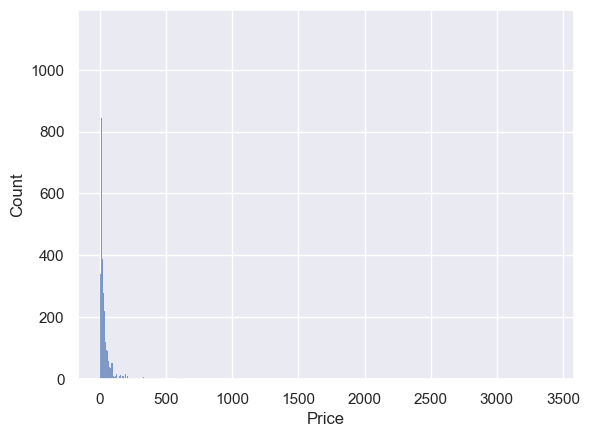

In [15]:
sns.histplot(data_no_mv['Price'])

### Dealing with outliers

In [45]:
# Declare a variable that will be equal to the 90th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
count,8569,8569,8569,8569,8569.000000,8569.000000,8569.000000,8569.000000
unique,6645,30,622,2705,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN
freq,43,2621,324,40,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.883265,408.679543,32.801334,2014.887618
std,NaN,NaN,NaN,NaN,0.302179,858.340450,41.487180,3.145528
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,1988.000000
25%,NaN,NaN,NaN,NaN,3.700000,65.000000,10.630000,2014.000000
50%,NaN,NaN,NaN,NaN,3.900000,157.000000,17.950000,2016.000000
75%,NaN,NaN,NaN,NaN,4.100000,398.000000,37.450000,2017.000000


<Axes: xlabel='Price', ylabel='Count'>

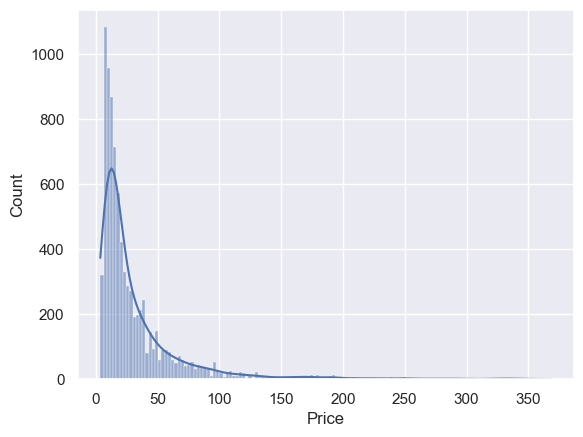

In [46]:
sns.histplot(data_1['Price'],kde=True)

<Axes: xlabel='Rating', ylabel='Count'>

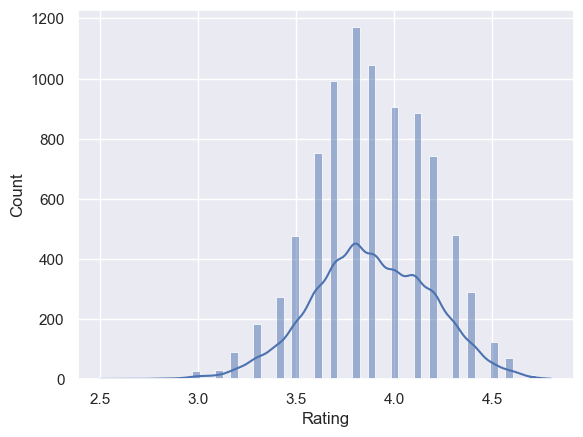

In [47]:
sns.histplot(data_1['Rating'],kde=True)

<Axes: xlabel='NumberOfRatings', ylabel='Count'>

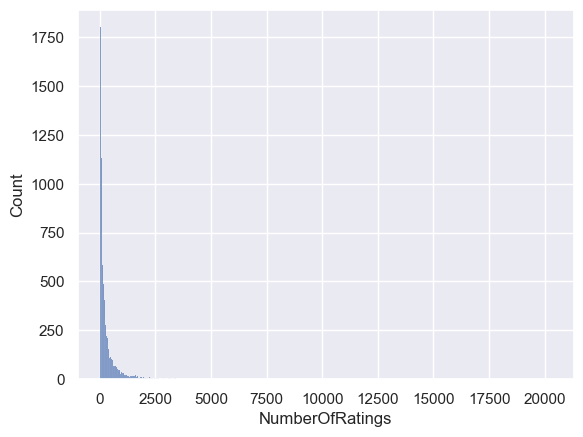

In [48]:
sns.histplot(data_1['NumberOfRatings'])

In [49]:
# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_1['NumberOfRatings'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_2 = data_1[data_1['NumberOfRatings']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_2.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
count,8483,8483,8483,8483,8483.000000,8483.000000,8483.000000,8483.000000
unique,6590,30,620,2702,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN
freq,42,2594,307,39,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.882200,347.929506,32.771766,2014.884239
std,NaN,NaN,NaN,NaN,0.302133,519.387969,41.210753,3.151715
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,1988.000000
25%,NaN,NaN,NaN,NaN,3.700000,65.000000,10.650000,2014.000000
50%,NaN,NaN,NaN,NaN,3.900000,154.000000,17.950000,2016.000000
75%,NaN,NaN,NaN,NaN,4.100000,383.500000,37.615000,2017.000000


<Axes: xlabel='NumberOfRatings', ylabel='Count'>

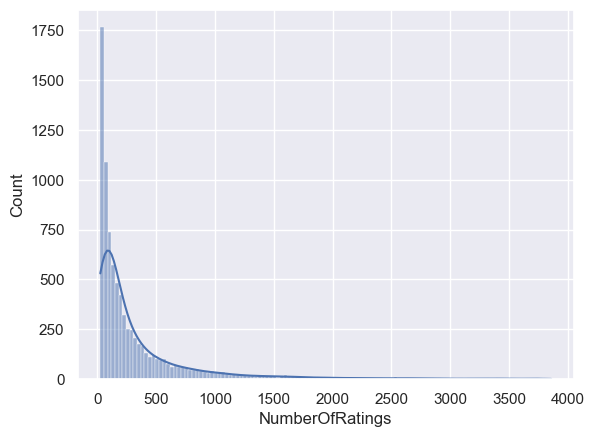

In [50]:
sns.histplot(data_2['NumberOfRatings'],kde=True)

<Axes: xlabel='Year', ylabel='Count'>

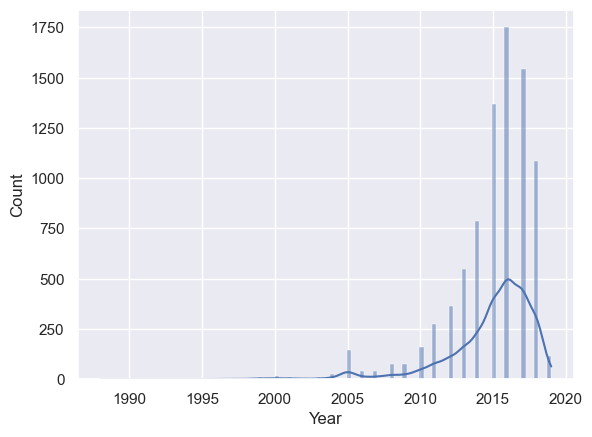

In [51]:
sns.histplot(data_2['Year'], kde=True)

In [52]:
# Outliers are on the low end, Taking off very old vintage wines
q = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year']>q]

<Axes: xlabel='Year', ylabel='Count'>

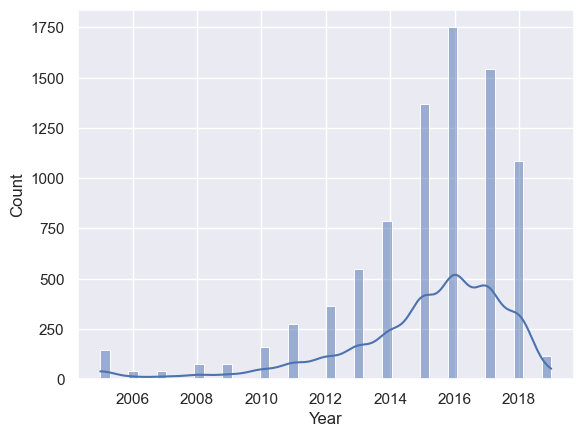

In [53]:
sns.histplot(data_3['Year'], kde=True)

In [56]:
data_cleaned = data_3.reset_index(drop=True)

In [54]:
data_cleaned.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Year,log_price,log_year
count,7955,7955,7955,7955,7955.000000,7955.000000,7955.000000,7955.000000,7955.000000
unique,6259,30,608,2619,NaN,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN,NaN
freq,42,2503,298,35,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.855952,346.562665,2015.321433,2.935047,7.608533
std,NaN,NaN,NaN,NaN,0.287342,518.452575,2.305199,0.757478,0.001145
min,NaN,NaN,NaN,NaN,2.500000,25.000000,2006.000000,1.266948,7.603898
25%,NaN,NaN,NaN,NaN,3.700000,65.000000,2014.000000,2.325325,7.607878
50%,NaN,NaN,NaN,NaN,3.900000,154.000000,2016.000000,2.827314,7.608871
75%,NaN,NaN,NaN,NaN,4.100000,382.000000,2017.000000,3.498022,7.609367


# Part 2

## Checking the OLS assumptions

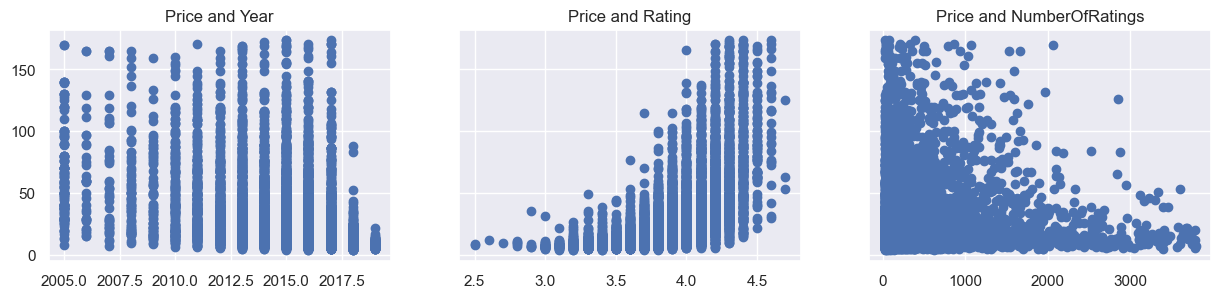

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['Rating'],data_cleaned['Price'])
ax2.set_title('Price and Rating')
ax3.scatter(data_cleaned['NumberOfRatings'],data_cleaned['Price'])
ax3.set_title('Price and NumberOfRatings')


plt.show()

/var/folders/s2/gt_9yfgn177bs30xy2s7l4_r0000gn/T/ipykernel_85869/462586877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Price'])


<Axes: xlabel='Price', ylabel='Density'>

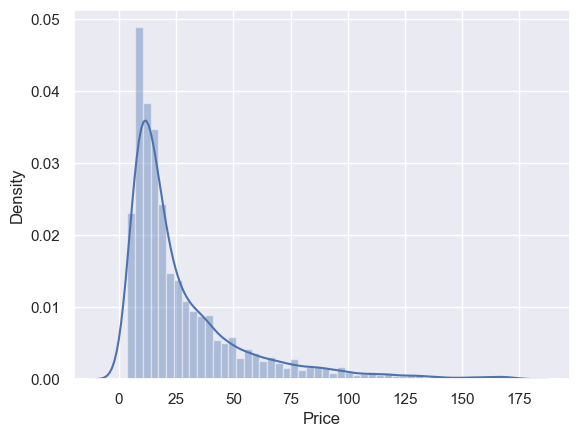

In [23]:
sns.distplot(data_cleaned['Price'])

In [24]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,log_price
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011.0,4.553877
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017.0,2.740840
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015.0,2.008214
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019.0,2.165619
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016.0,3.372455
...,...,...,...,...,...,...,...,...,...
8220,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016.0,2.801541
8221,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016.0,3.000222
8222,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010.0,3.175968
8223,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019.0,1.826161


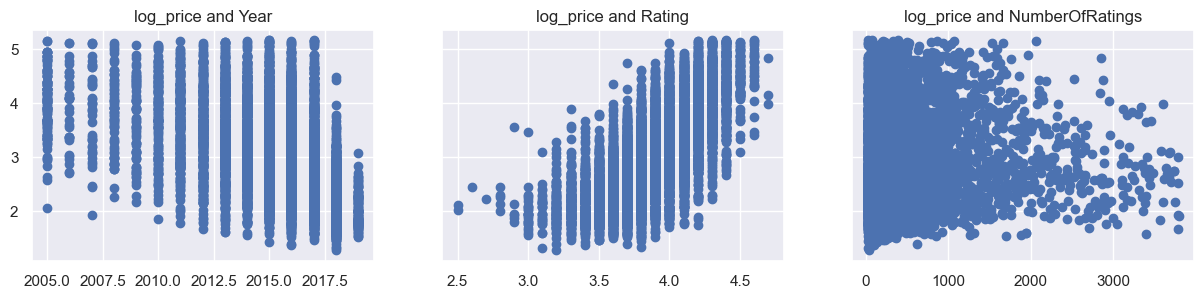

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['Rating'],data_cleaned['log_price'])
ax2.set_title('log_price and Rating')
ax3.scatter(data_cleaned['NumberOfRatings'],data_cleaned['log_price'])
ax3.set_title('log_price and NumberOfRatings')


plt.show()

In [26]:
# Let's transform 'Price' with a log transformation
log_NumberOfRatings = np.log(data_cleaned['NumberOfRatings'])

# Then we add it to our data frame
data_cleaned['log_NumberOfRatings'] = log_NumberOfRatings
data_cleaned

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,log_price,log_NumberOfRatings
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011.0,4.553877,4.605170
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017.0,2.740840,4.605170
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015.0,2.008214,4.605170
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019.0,2.165619,4.605170
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016.0,3.372455,4.605170
...,...,...,...,...,...,...,...,...,...,...
8220,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016.0,2.801541,6.901737
8221,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016.0,3.000222,6.902743
8222,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010.0,3.175968,6.903747
8223,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019.0,1.826161,6.905753


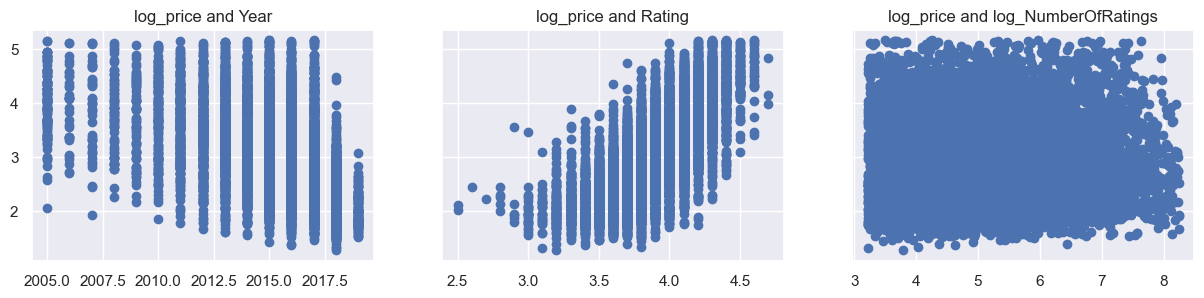

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['Rating'],data_cleaned['log_price'])
ax2.set_title('log_price and Rating')
ax3.scatter(data_cleaned['log_NumberOfRatings'],data_cleaned['log_price'])
ax3.set_title('log_price and log_NumberOfRatings')


plt.show()

In [28]:
# Let's transform 'Price' with a log transformation
log_year = np.log(data_cleaned['Year'])

# Then we add it to our data frame
data_cleaned['log_year'] = log_year
data_cleaned

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,log_price,log_NumberOfRatings,log_year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011.0,4.553877,4.605170,7.606387
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017.0,2.740840,4.605170,7.609367
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015.0,2.008214,4.605170,7.608374
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019.0,2.165619,4.605170,7.610358
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016.0,3.372455,4.605170,7.608871
...,...,...,...,...,...,...,...,...,...,...,...
8220,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016.0,2.801541,6.901737,7.608871
8221,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016.0,3.000222,6.902743,7.608871
8222,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010.0,3.175968,6.903747,7.605890
8223,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019.0,1.826161,6.905753,7.610358


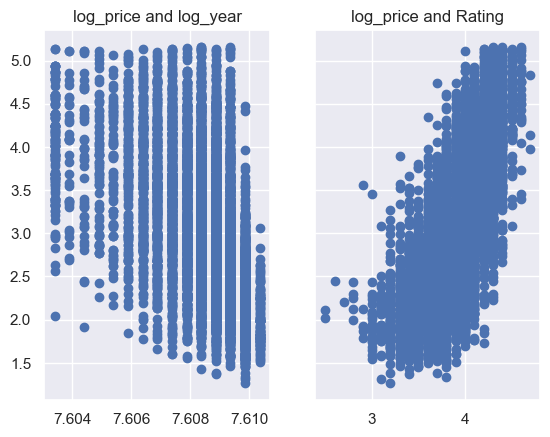

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['log_year'],data_cleaned['log_price'])
ax1.set_title('log_price and log_year')
ax2.scatter(data_cleaned['Rating'],data_cleaned['log_price'])
ax2.set_title('log_price and Rating')

plt.show()

In [32]:
data_cleaned = data_cleaned.drop(['Price','log_NumberOfRatings'],axis=1)

In [35]:
data_cleaned.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Year,log_price,log_year
count,8225,8225,8225,8225,8225.000000,8225.000000,8225.000000,8225.000000,8225.000000
unique,6400,30,612,2675,NaN,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN,NaN
freq,42,2546,301,37,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.867733,346.919635,2015.119149,2.986649,7.608433
std,NaN,NaN,NaN,NaN,0.292629,514.612791,2.648857,0.804016,0.001316
min,NaN,NaN,NaN,NaN,2.500000,25.000000,2005.000000,1.266948,7.603399
25%,NaN,NaN,NaN,NaN,3.700000,65.000000,2014.000000,2.351375,7.607878
50%,NaN,NaN,NaN,NaN,3.900000,155.000000,2016.000000,2.862201,7.608871
75%,NaN,NaN,NaN,NaN,4.100000,385.000000,2017.000000,3.555348,7.609367


### Multicollinearity

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Rating','Year']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [53]:
vif

,VIF,Features
0,173.890255,Rating
1,173.890255,Year


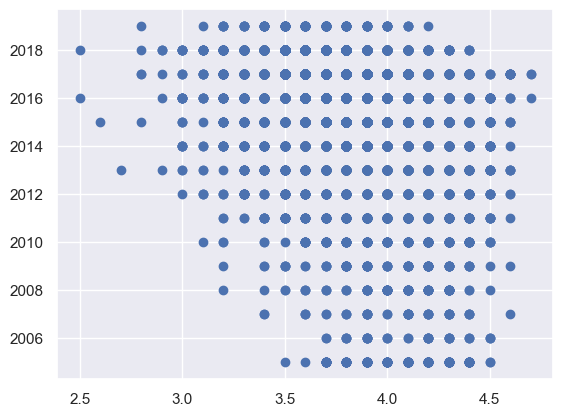

In [54]:
plt.scatter(data_cleaned['Rating'],data_cleaned['Year'])

In [43]:
data_cleaned[['Rating', 'Year']].corr()

,Rating,Year
Rating,1.000000,-0.293328
Year,-0.293328,1.000000


In [45]:
data_cleaned[['Rating', 'Year']].describe()

,Rating,Year
count,8225.000000,8225.000000
mean,3.867733,2015.119149
std,0.292629,2.648857
min,2.500000,2005.000000
25%,3.700000,2014.000000
50%,3.900000,2016.000000
75%,4.100000,2017.000000
max,4.700000,2019.000000


In [47]:
data_cleaned.dtypes

Name                object
Country             object
Region              object
Winery              object
Rating             float64
NumberOfRatings      int64
Year               float64
log_price          float64
log_year           float64
dtype: object

In [49]:
data_cleaned[['Rating', 'Year']].isnull().sum()

Rating    0
Year      0
dtype: int64

### Scale the inputs

In [60]:
from sklearn.preprocessing import StandardScaler
x = data_cleaned[['Rating', 'Year']].copy()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

### Check VIF on scaled data

In [62]:
vif = pd.DataFrame()
vif["Feature"] = x.columns
vif["VIF"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

In [63]:
vif

,Feature,VIF
0,Rating,1.094142
1,Year,1.094142
